### All Lab/HWs will be graded based on three criteria:

1. Mechanical correctness of your python codes: your codes must be accurate
2. Clarity of jupyter notebook and organization of outputs:

- The python codes you write must be accompanied with "comments" using # or markdown
- All outputs must be visible in your jupyter notebook. If necessary, explain the outputs using markdown.
- **Do not print out an entire output. Print the first two or five rows**

3. Formatting: **"All Labs / HWs must contain K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."** 

 - A **grade of XF** can result from a breach of academic honesty. The F indicates failure in the course; the X indicates the reason is an Honor Pledge violation.” (http://www.k-state.edu/provost/resources/teaching/course.htm (Links to an external site.)) (See Academic Dishonesty below). 
- **Unauthorized collaboration** (including but not limited to collaborating with other students on lab, HW, the midterm exam, and the final project is forbidden) 
- **Unauthorized aid** (including but not limited to sharing your codes with other students, receiving codes from another)
- Plagiarism (including but not limited to copying words of another (on the Internet or articles) as your own)

**K-State Honor Code**

> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Bhaskar Aryal

# K-means clustering of School Data

#### Import modules 

In [1]:
# Import modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

#### Load Data into a Pandas Dataframe

In [2]:
# Read data with pandas
df = pd.read_csv('data/schools.csv')
df.head()

,School_Code,School_Name,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,10505.0,Abington High,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8
1,10003.0,Beaver Brook Elementary School,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6
2,10002.0,Center Elementary School,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6
3,10405.0,Frolio Middle School,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1
4,10015.0,Woodsdale Elementary School,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4


In [3]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   School_Code                       1861 non-null   float64
 1   School_Name                       1861 non-null   object 
 2   Pct_First_Language_Not_English    1850 non-null   float64
 3   Pct_English_Language_Learner      1850 non-null   float64
 4   Pct_Students_With_Disabilities    1850 non-null   float64
 5   Pct_High_Needs                    1850 non-null   float64
 6   Pct_Economically_Disadvantaged    1850 non-null   float64
 7   Pct_African_American              1850 non-null   float64
 8   Pct_Asian                         1850 non-null   float64
 9   Pct_Hispanic                      1850 non-null   float64
 10  Pct_White                         1850 non-null   float64
 11  Pct_Native_American               1850 non-null   float64
 12  Pct_Na

In [4]:
# Brief statistical summary of the data 
df.describe()

,School_Code,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
count,1.861000e+03,1850.00000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1823.000000
mean,2.918442e+06,18.54827,9.548432,18.223676,46.616216,31.816649,8.699459,6.050919,18.996649,62.326486,0.233459,0.098000,3.596595,51.899405,48.095135,18.320570
std,3.941407e+06,20.03104,13.163096,11.462500,22.966461,22.409908,13.698280,8.763984,22.575734,29.562086,0.501732,0.285813,2.420830,5.121577,5.122469,3.966979
min,1.000200e+04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,2.000000
25%,9.700600e+05,3.20000,0.900000,12.900000,27.400000,12.825000,1.400000,1.200000,4.000000,41.000000,0.000000,0.000000,1.900000,49.400000,46.400000,16.300000
50%,2.100410e+06,10.50000,3.600000,16.100000,41.200000,25.900000,3.300000,2.600000,8.200000,73.200000,0.000000,0.000000,3.200000,51.400000,48.600000,18.600000
75%,3.310030e+06,27.90000,13.200000,20.000000,64.975000,47.800000,8.700000,6.900000,27.300000,86.600000,0.300000,0.100000,4.775000,53.600000,50.600000,20.800000
max,3.902090e+07,100.00000,82.900000,100.000000,100.000000,94.400000,86.900000,73.700000,98.000000,100.000000,8.000000,6.100000,17.400000,100.000000,76.000000,41.100000


# Data Preparation 

- Drop two columns ('School_Code', 'School_Name')
- Handle missing values

In [5]:
# Drop columns School_Code and School_Name 
df.drop(['School_Code', 'School_Name'], axis =1, inplace = True)

In [6]:
# check if the dataframe
list(df.columns)

['Pct_First_Language_Not_English',
 'Pct_English_Language_Learner',
 'Pct_Students_With_Disabilities',
 'Pct_High_Needs',
 'Pct_Economically_Disadvantaged',
 'Pct_African_American',
 'Pct_Asian',
 'Pct_Hispanic',
 'Pct_White',
 'Pct_Native_American',
 'Pct_Native_Hawaiian_Pacific_Isla',
 'Pct_MultiRace_NonHispanic',
 'Pct_Males',
 'Pct_Females',
 'Average_Class_Size']

In [7]:
# Missing values 
df.isnull().sum()

Pct_First_Language_Not_English      11
Pct_English_Language_Learner        11
Pct_Students_With_Disabilities      11
Pct_High_Needs                      11
Pct_Economically_Disadvantaged      11
Pct_African_American                11
Pct_Asian                           11
Pct_Hispanic                        11
Pct_White                           11
Pct_Native_American                 11
Pct_Native_Hawaiian_Pacific_Isla    11
Pct_MultiRace_NonHispanic           11
Pct_Males                           11
Pct_Females                         11
Average_Class_Size                  38
dtype: int64

#### Handling Missing Values:
Out of different ways to handle missing values, I choose to drop all the rows that contain missing values and proceed with the analysis. Two reasons why I choose to remove the missing values are:

- Injecting mean/median values may sometimes lead to inaccurate analyses as they my introduce bias in the dataset
- Given the length of the data, I belive, dropping the rows with missing data will have negligible imapact on model metrics

In [8]:
# drop rows with missing values 
df = df.dropna()

# verify the missing values 
df.isnull().sum()

Pct_First_Language_Not_English      0
Pct_English_Language_Learner        0
Pct_Students_With_Disabilities      0
Pct_High_Needs                      0
Pct_Economically_Disadvantaged      0
Pct_African_American                0
Pct_Asian                           0
Pct_Hispanic                        0
Pct_White                           0
Pct_Native_American                 0
Pct_Native_Hawaiian_Pacific_Isla    0
Pct_MultiRace_NonHispanic           0
Pct_Males                           0
Pct_Females                         0
Average_Class_Size                  0
dtype: int64

In [9]:
# check the total missing valus in the dataset 
df.isnull().sum().sum()

0

# Perform variance analysis

- Explain why data normalization is necessary

In [10]:
# Homogenity of variance test 
df.var()

Pct_First_Language_Not_English      404.383426
Pct_English_Language_Learner        174.065427
Pct_Students_With_Disabilities      124.524392
Pct_High_Needs                      527.478833
Pct_Economically_Disadvantaged      504.583759
Pct_African_American                185.179021
Pct_Asian                            76.950470
Pct_Hispanic                        512.353186
Pct_White                           877.534691
Pct_Native_American                   0.247437
Pct_Native_Hawaiian_Pacific_Isla      0.079760
Pct_MultiRace_NonHispanic             5.876525
Pct_Males                            25.421004
Pct_Females                          25.430093
Average_Class_Size                   15.736926
dtype: float64

The scale of variables differes to an extent that it can impact our analysis. Hence we will normalize the data before further analysis. 

# Normalize data & Check variance again

In [11]:
# Normalize the data
#http://stackoverflow.com/questions/12525722/normalize-data-in-pandas

df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,-0.13276,-0.086390,-0.084592,-0.177116,-0.108704,-0.080131,-0.061879,-0.100950,0.23435,-0.003895,0.016897,-0.155412,-0.082948,0.083022,-0.064465
1,-0.08076,-0.028489,-0.048592,-0.094116,-0.089636,-0.083857,-0.056452,-0.125440,0.26035,0.033605,0.016897,-0.189895,-0.022422,0.022495,0.160599
2,-0.05776,-0.079152,0.030408,-0.125116,-0.163789,-0.059013,-0.041527,-0.108093,0.22335,-0.028895,-0.015890,-0.207136,0.030210,-0.030136,-0.095155
3,-0.13076,-0.093627,-0.050592,-0.157116,-0.107645,-0.077646,-0.057809,-0.131563,0.26935,-0.028895,-0.015890,-0.189895,0.019683,-0.019610,0.071085
4,-0.12676,-0.091215,-0.073592,-0.159116,-0.095992,-0.082615,-0.063236,-0.150950,0.29735,-0.028895,-0.015890,-0.189895,-0.015843,0.015917,0.308937


In [12]:
# Check variance again 
df_norm.var()

Pct_First_Language_Not_English      0.040438
Pct_English_Language_Learner        0.025328
Pct_Students_With_Disabilities      0.012452
Pct_High_Needs                      0.052748
Pct_Economically_Disadvantaged      0.056623
Pct_African_American                0.028576
Pct_Asian                           0.014167
Pct_Hispanic                        0.053348
Pct_White                           0.087753
Pct_Native_American                 0.003866
Pct_Native_Hawaiian_Pacific_Isla    0.002144
Pct_MultiRace_NonHispanic           0.019410
Pct_Males                           0.004401
Pct_Females                         0.004403
Average_Class_Size                  0.010294
dtype: float64

# Clustering analysis (k = 2): Include "random_state=0"

In [13]:
# clustering analysis using k-means
#two clusters
k_means = KMeans(init='k-means++', 
                 n_init='auto',
                 n_clusters=2, 
                 random_state=0)

In [14]:
# fit the model 
k_means.fit(df_norm)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [15]:
# cluster labels
k_means.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [16]:
# find out cluster centers
k_means.cluster_centers_

array([[-0.09703442, -0.07235229, -0.01278394, -0.12068386, -0.1208956 ,
        -0.06245258, -0.00170108, -0.11795934,  0.16568047,  0.00054548,
        -0.00067371,  0.00830343, -0.00573112,  0.00571126, -0.00107118],
       [ 0.23799161,  0.17745496,  0.03135454,  0.29599545,  0.29651478,
         0.1531744 ,  0.00417215,  0.28931316, -0.40635647, -0.00133786,
         0.00165237, -0.02036542,  0.01405644, -0.01400774,  0.00262724]])

In [17]:
# convert cluster lables to dataframe
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [18]:
df3 = df.join(df1)
df3.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size,cluster
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8,0.0
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6,0.0
2,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6,0.0
3,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1,0.0
4,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4,0.0


# Interpretation of Clustering Analysis

- When you answer the following questions below, use the original data (not the normalized data) for better interpretability

## How many observations are there in cluster 1 and cluster 2?

In [19]:
df3.groupby('cluster').size()

cluster
0.0    1275
1.0     516
dtype: int64

There are 1275 observations in cluster 0 and 516 observations in cluster 1

## The mean values of each cluster in terms of different variables (e.g., Pct_High_Needs)

## What is the profile of each cluster?

#### Cluster 0
- Cluster 0 represents schools with a majority of White students, facing fewer economic and language learning challenges, and having slightly smaller class sizes.

#### Cluster 1
- Cluster 1 appears to include schools with a diverse student body, including a higher percentage of students who are economically disadvantaged, English language learners, or have disabilities. These schools also tend to have slightly larger class sizes.

## The mean values for"Pct_African_American" in each cluster. Also visualize it.

- The mean value for Pct_African_American in cluster 0 is -0.042740
- The mean value for Pct_African_American in cluster 1 is 0.098985

C:\Users\aryal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


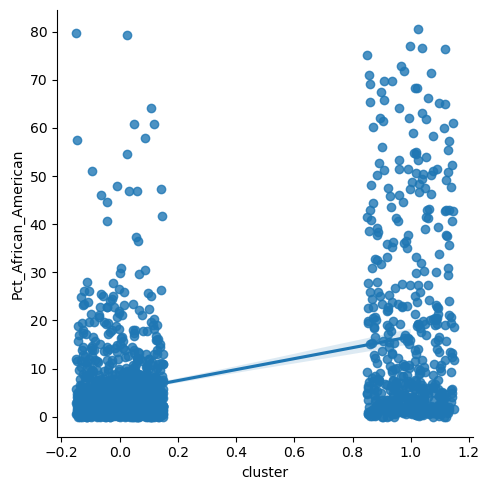

In [20]:
# visualization 
sns.lmplot(x="cluster", y="Pct_African_American", data=df3, x_jitter=.15, y_jitter=.15);

Pct_African_American appears to be a factor from the cluster visualization 

## Which of the following statement is TRUE?

a. Schools in cluster 1, on average, have a higher percentage of African American students?

b. Schools in cluster 2, on average, have a higher percentage of African American students?

- Statement a is False (considering the question is about first cluster - Cluster 0)
- Statement b is True (considering the question is about the second cluster - Cluster 1)

## The mean values for "Pct_First_Language_Not_English" in each cluster. Also visualize it.

- The mean value for Pct_First_Language_Not_English in cluster 0 is -0.057965
- The mean value for Pct_First_Language_Not_English in cluster 1 is 0.132149

C:\Users\aryal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


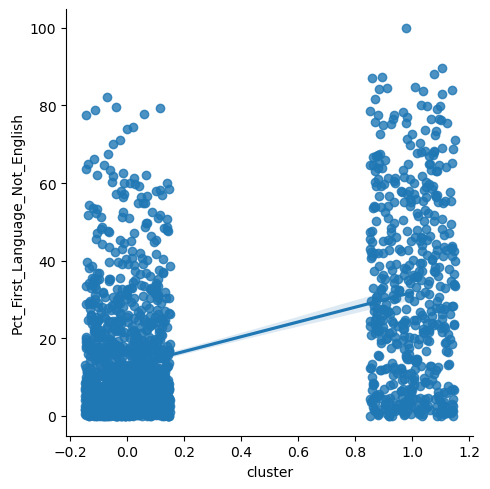

In [21]:
# visualization 
sns.lmplot(x="cluster", y="Pct_First_Language_Not_English", data=df3, x_jitter=.15, y_jitter=.15);

## Which cluster has a higher percentage of economically disadvantaged students 

C:\Users\aryal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


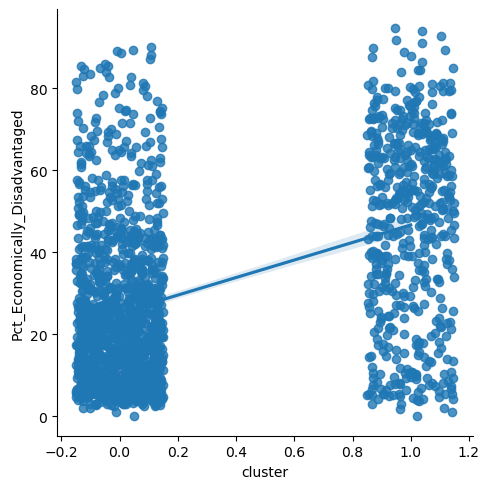

In [22]:
# visualization 
sns.lmplot(x="cluster", y="Pct_Economically_Disadvantaged", data=df3, x_jitter=.15, y_jitter=.15);

Comments: 
- Cluster 1 has more economically disadvantaged students than cluster 0. 

# Build Decision Tree model (use the original data, not the normalizaed data)

- Do model building using decision tree algorithm
- A full grown decision tree would be too big to show in the notebook. Use ```max_depth=3``` and build a simple decision tree model.

In [23]:
# set X and y
df3 = df3.dropna()
y = df3['cluster'].values
X = df3.drop(['cluster'], axis=1)

In [24]:
X.head(2)

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6


In [25]:
# import DecisionTreeClassifier

from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

In [26]:
# instantiate a decision tree model, and fit with X and y (no split validation needed)
model = DecisionTreeClassifier()
model.fit(X, y)
# check the accuracy on the training set

DecisionTreeClassifier()

In [27]:
predicted_Y = model.predict(X)
print(predicted_Y)

[0. 0. 0. ... 1. 0. 1.]


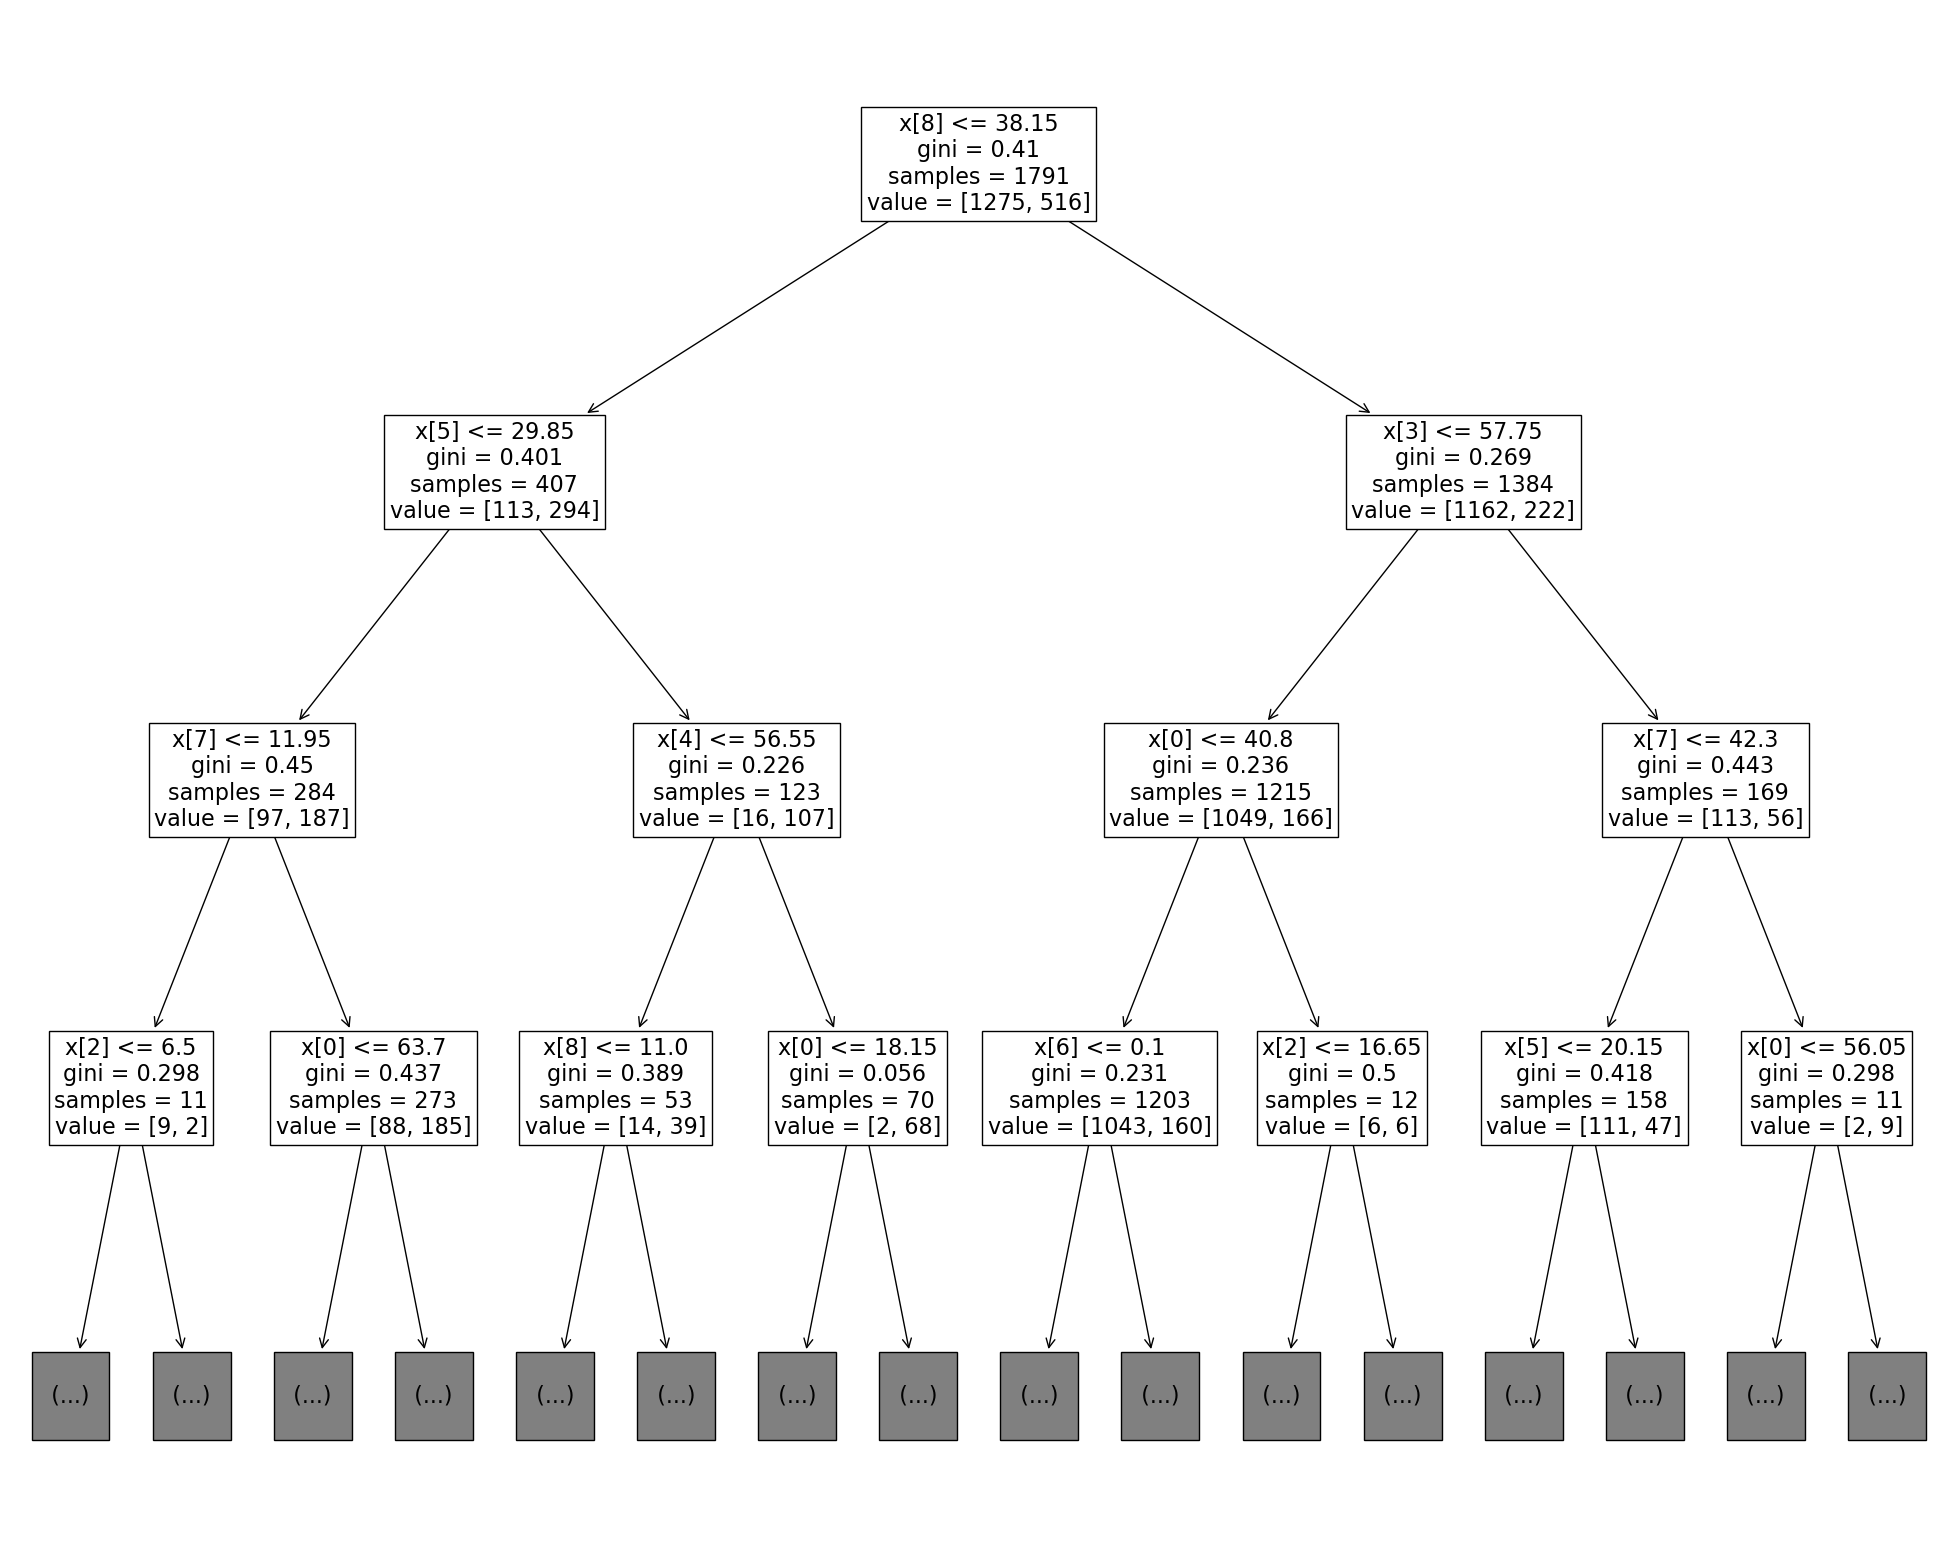

In [28]:
plt.figure(figsize=(25, 20))
tree.plot_tree(model, max_depth = 3, 
              fontsize = 16);

## Plot tree with ```tree.plot_tree```

- Use ```figsize=(25,20)```
- To make the texts of the tree nodes more readable, you add ```fontsize=16``` into ```tree.plot_tree``` as another parameter.

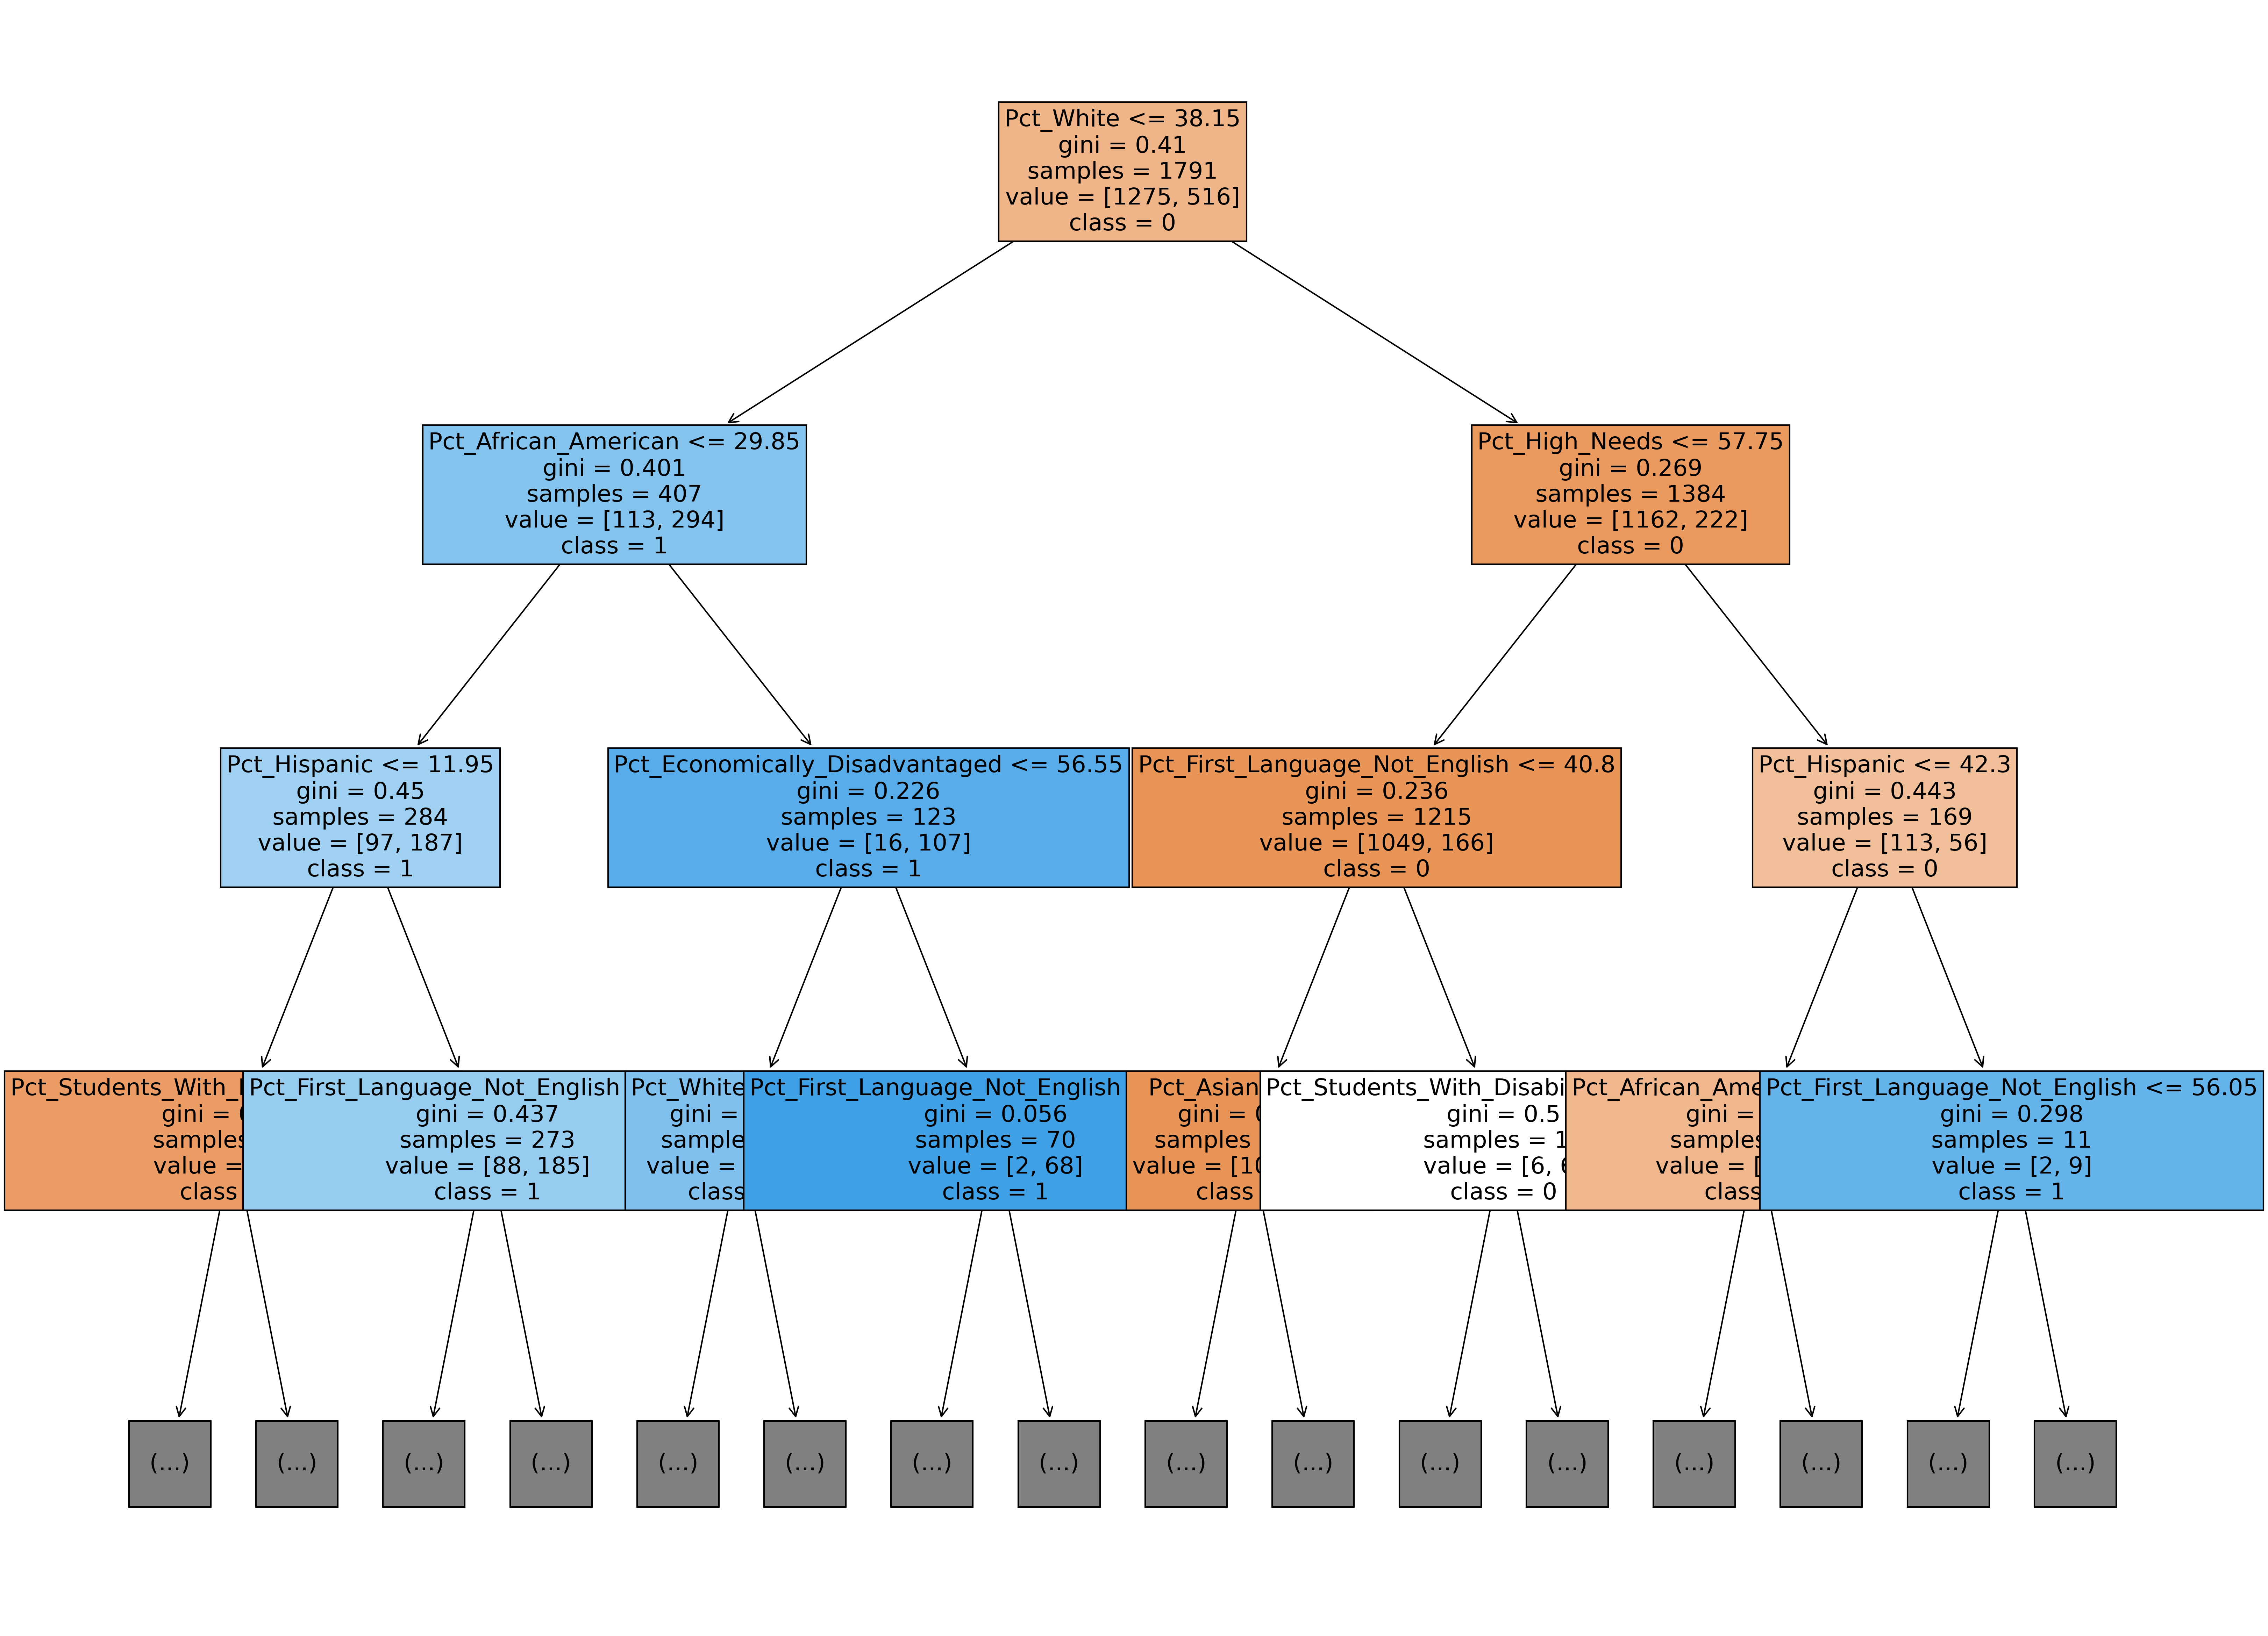

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=300)
tree.plot_tree(model,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],    
               filled = True, max_depth = 3, fontsize = 16);

## generate if-then rules using ```export_text```

In [30]:
text_representation = tree.export_text(model, feature_names=(list(X.columns)), max_depth = 3)
print(text_representation)

|--- Pct_White <= 38.15
|   |--- Pct_African_American <= 29.85
|   |   |--- Pct_Hispanic <= 11.95
|   |   |   |--- Pct_Students_With_Disabilities <= 6.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- Pct_Students_With_Disabilities >  6.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- Pct_Hispanic >  11.95
|   |   |   |--- Pct_First_Language_Not_English <= 63.70
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- Pct_First_Language_Not_English >  63.70
|   |   |   |   |--- truncated branch of depth 9
|   |--- Pct_African_American >  29.85
|   |   |--- Pct_Economically_Disadvantaged <= 56.55
|   |   |   |--- Pct_White <= 11.00
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- Pct_White >  11.00
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- Pct_Economically_Disadvantaged >  56.55
|   |   |   |--- Pct_First_Language_Not_English <= 18.15
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Pct_First_Language_Not_

## Now, interpret the if-then rules. Specifically, extract any two decision (of if-then) rules from the results above.

- If-then rule #1

- If-then rule #2

##### Rule 1
If the percentage of White individuals is greater than 38.15%, and the percentage of high needs individuals is greater than 57.75%, and the percentage of Hispanic individuals is greater than 42.30%, and the percentage of African American individuals is greater than 6.80%, then the cluster is predicted to be 0.

##### Rule 2
If the percentage of White individuals is greater than 38.15%, and the percentage of high-needs individuals is less than or equal to 57.75%, and the percentage of individuals whose first language is not English is greater than 40.80%, and the percentage of students with disabilities is less than or equal to 16.65%, then the cluster is predicted to be 1.

## Decision tree also shows the variables that are more important in creating clusters. Which variables are considered most important in this clustering analysis?

## Build randomforestclassifier model for feature importance 

The percentage of white appears to be one of the most important variable in cluster analysis. We will verify this with the random classifier's feature importance 

In [31]:
# build randomforeastmodel

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)  
clf=clf.fit(X, y)
clf.score(X,y)

0.9949748743718593

In [32]:
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})
feature_importance

,feature,importance
0,Pct_First_Language_Not_English,0.066149
1,Pct_English_Language_Learner,0.047650
2,Pct_Students_With_Disabilities,0.060374
3,Pct_High_Needs,0.073795
4,Pct_Economically_Disadvantaged,0.104433
5,Pct_African_American,0.075756
6,Pct_Asian,0.050574
7,Pct_Hispanic,0.092732
8,Pct_White,0.201115
9,Pct_Native_American,0.022697


In [33]:
 feature_importance.sort_values(by='importance', ascending=False).reset_index()

,index,feature,importance
0,8,Pct_White,0.201115
1,4,Pct_Economically_Disadvantaged,0.104433
2,7,Pct_Hispanic,0.092732
3,5,Pct_African_American,0.075756
4,3,Pct_High_Needs,0.073795
5,0,Pct_First_Language_Not_English,0.066149
6,2,Pct_Students_With_Disabilities,0.060374
7,14,Average_Class_Size,0.053723
8,11,Pct_MultiRace_NonHispanic,0.050844
9,6,Pct_Asian,0.050574


**Comments**: 
- Percentage of white appears to be a important feature for classification 
- Percentage of First_Language_Not_English appears to follow it

## Which variables are considered least important in this clustering analysis?

Pct_Native_Hawaiian_Pacific_Isla and Pct_Native_American are the top two least important variables for cluster analysis 

## Is the "average class size" considered important in this clustering analysis? Explain why.

Average_Class_Size is ranked 11th. I would consider it still marginally important as its not zero.

# Clustering analysis using AgglomerativeClustering (# of clusters = 2)

In [34]:
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt

np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

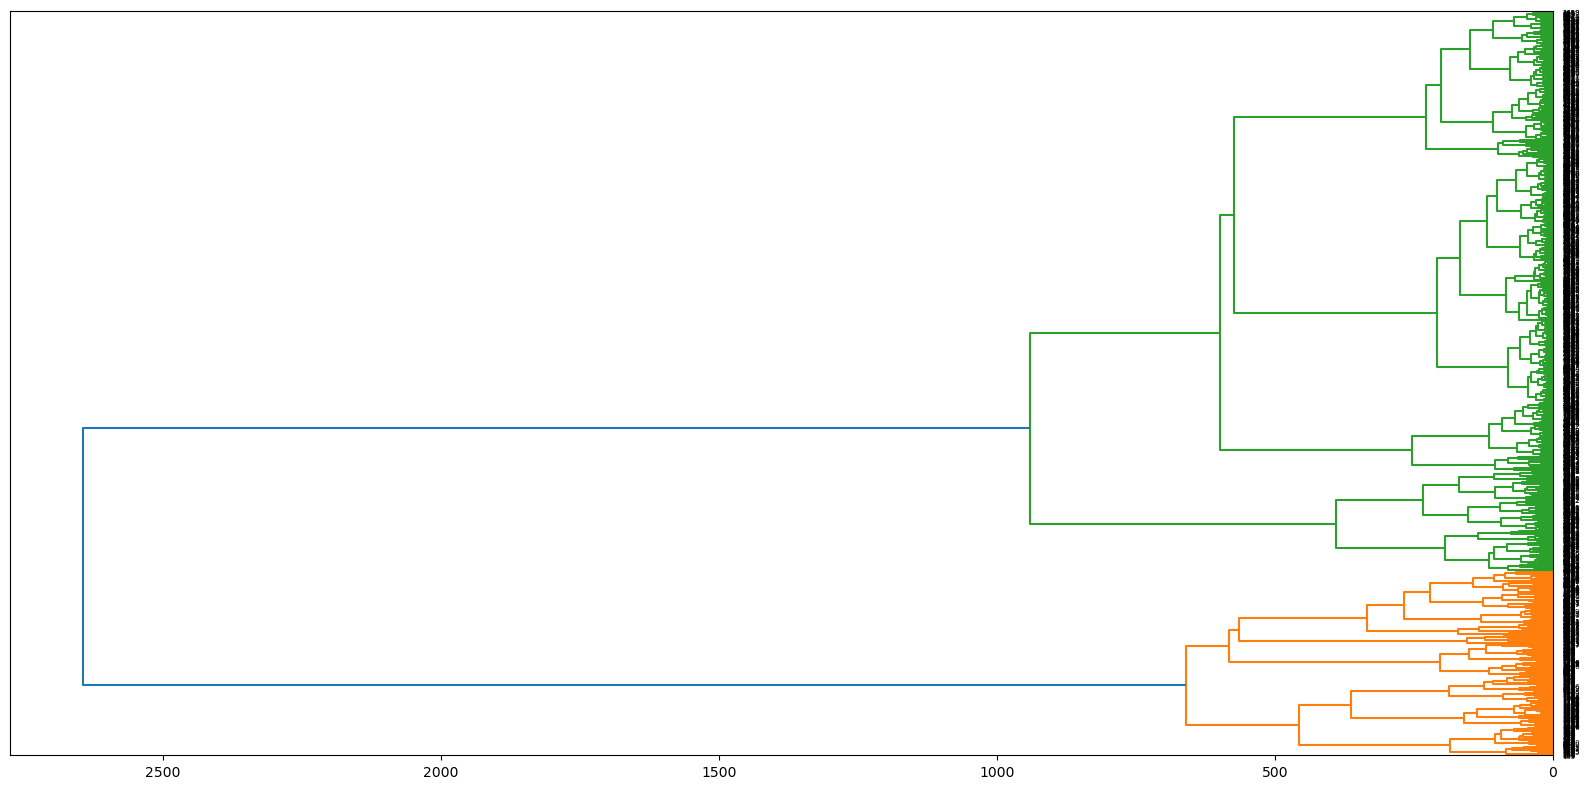

In [35]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

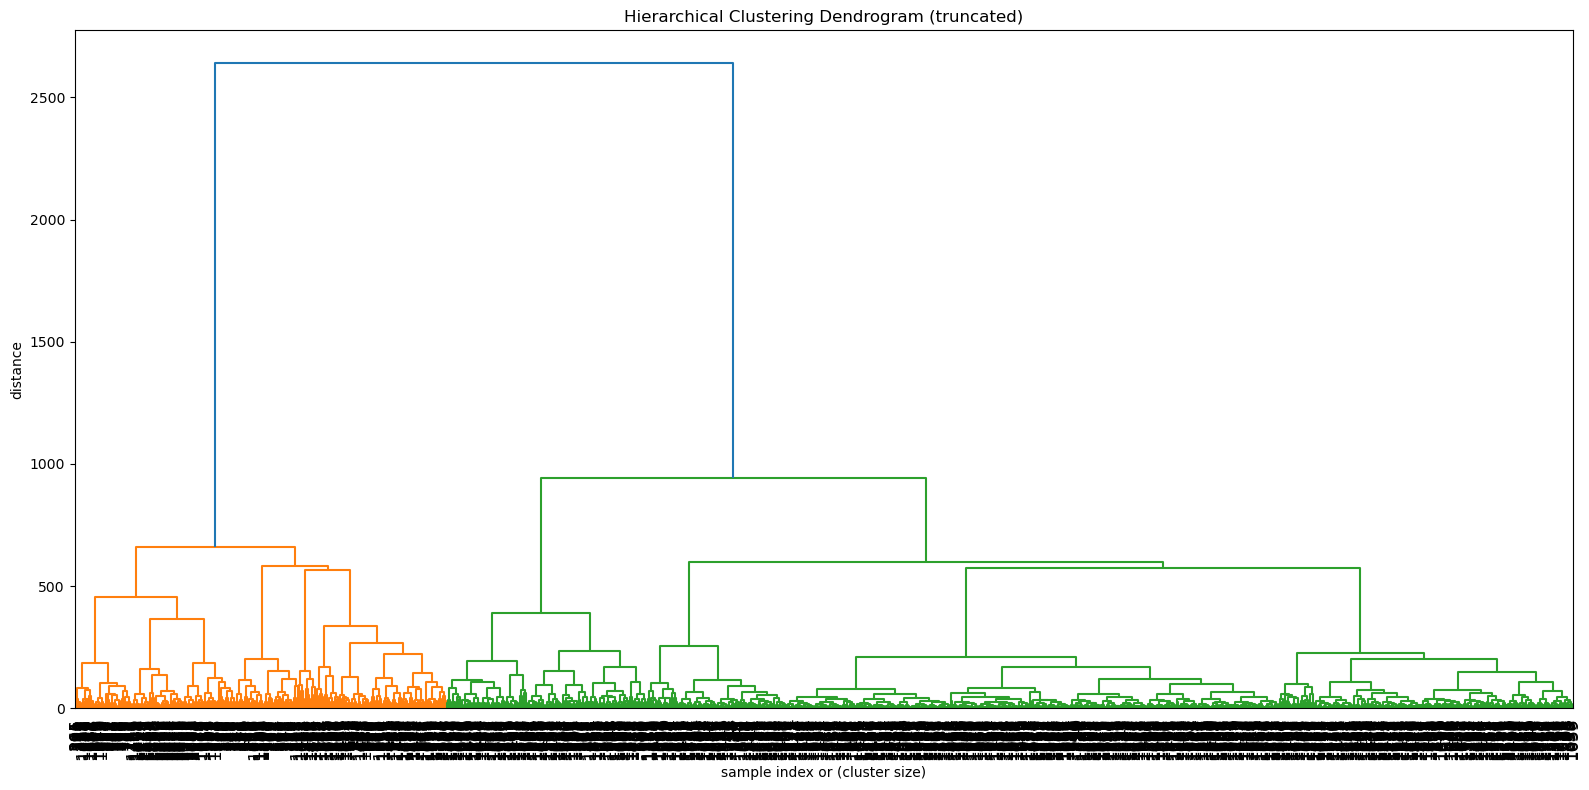

In [36]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

## Visualize dendrogram

- p = 2

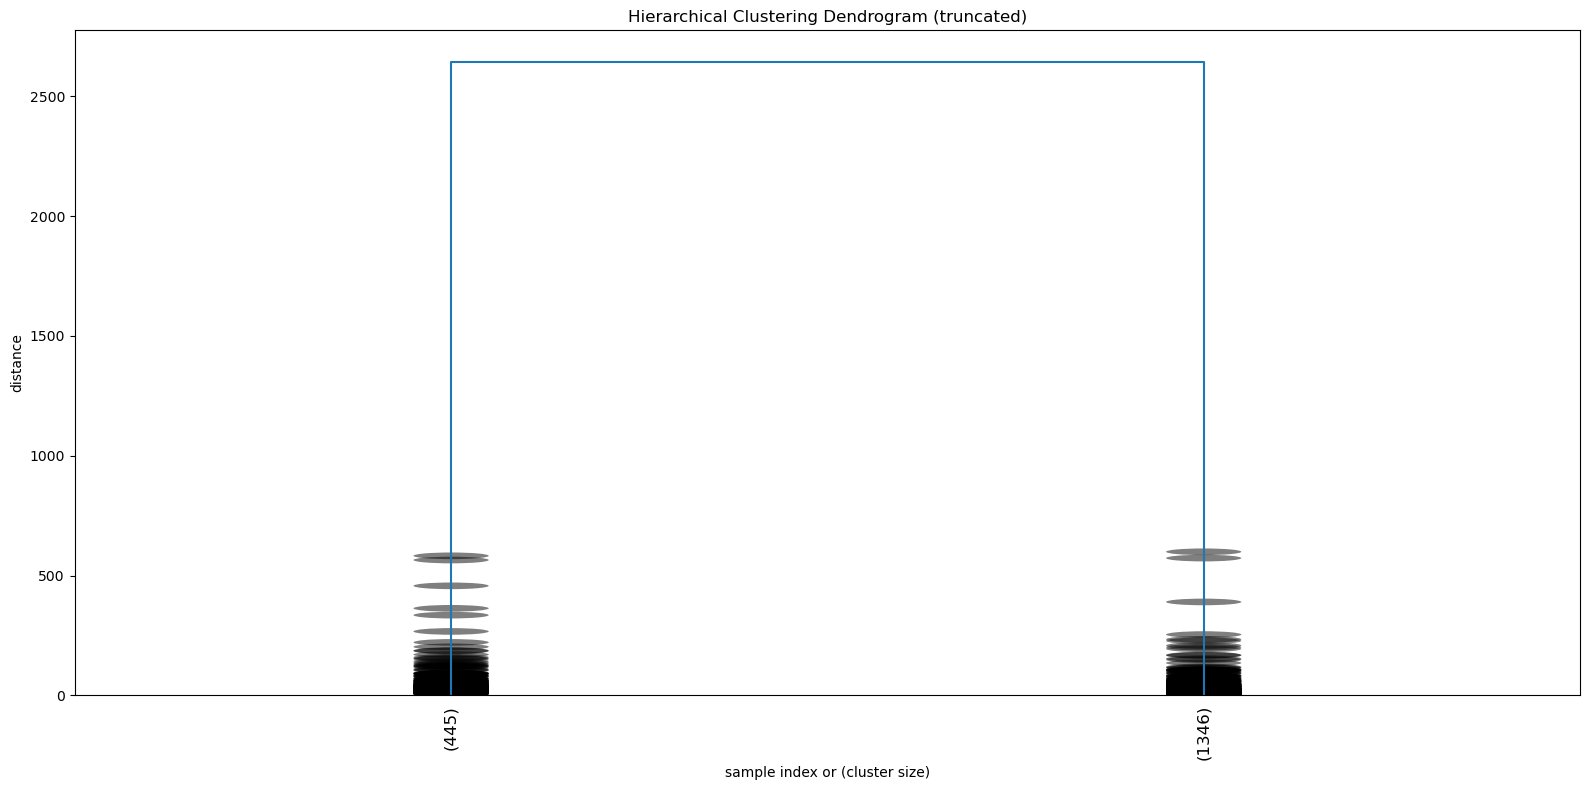

In [37]:
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

## How many observations are in each cluster?

Cluster 0 has 445 observations and cluster 1 has 1346 observations. 

## What is the profile of each cluster?

#### Cluster 0
- Cluster 0 has a majority of White students, facing fewer economic and language learning challenges, and having slightly smaller class sizes.

#### Cluster 1
- Cluster 1 includes schools with a diverse student body, including a higher percentage of students who are economically disadvantaged, English language learners, or have disabilities. These schools also tend to have slightly larger class sizes.

## Compare the results from K-Mean clustering analysis and Agglomerative clustering analysis.

- The number of observations in each cluster between the two methods is different 
- Both methods have more observations in cluster 0 than in cluster 1

Note: Several questions have been adapted from "SAS Enterprise Miner Exercise and Assignment Workbook by Varol Onur Kayhan"